In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

val_pred_df = pd.read_csv('val_pred.csv')
val_pred_df.head()

,image_path,label,subject,source,pred
0,data/Camera 1/train/c0/1589.jpg,0,p11,Camera 1,0
1,data/Camera 1/train/c0/1590.jpg,0,p11,Camera 1,0
2,data/Camera 1/train/c0/1592.jpg,0,p11,Camera 1,0
3,data/Camera 1/train/c0/1593.jpg,0,p11,Camera 1,0
4,data/Camera 1/train/c0/1594.jpg,0,p11,Camera 1,0


In [2]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

accuracy_score(val_pred_df['label'], val_pred_df['pred'])

0.8834372834372834

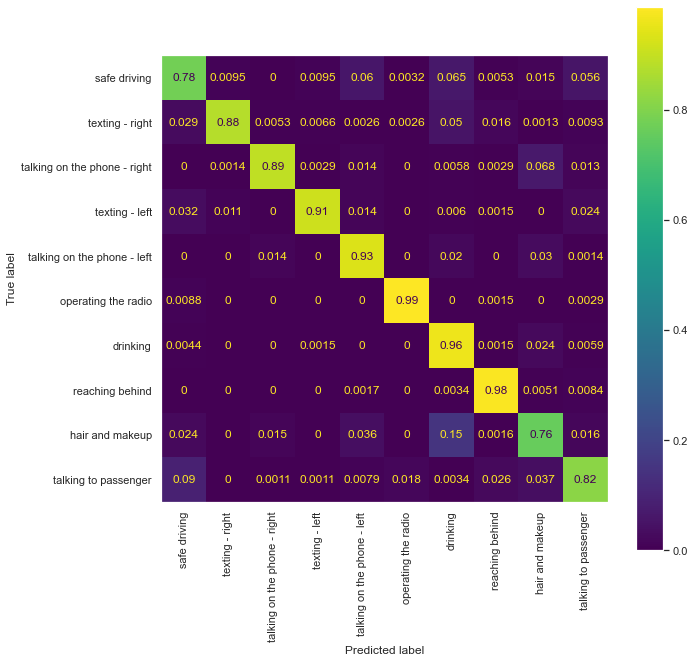

In [3]:
labels = [
    'safe driving',
    'texting - right',
    'talking on the phone - right',
    'texting - left',
    'talking on the phone - left',
    'operating the radio',
    'drinking',
    'reaching behind',
    'hair and makeup',
    'talking to passenger'
]

fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_predictions(val_pred_df['label'], val_pred_df['pred'], 
                                        normalize='true', ax=ax, display_labels=labels,
                                        xticks_rotation='vertical'
                                       )
ax.grid(False)
plt.show()

In [4]:
val_pred_df['correct'] = (val_pred_df['label'] == val_pred_df['pred'])

accuracy_per_class = val_pred_df.groupby(['label'])['correct'].mean()
accuracy_per_class

label
0    0.776246
1    0.876821
2    0.891462
3    0.912387
4    0.934379
5    0.986842
6    0.963235
7    0.981450
8    0.758509
9    0.815523
Name: correct, dtype: float64

<AxesSubplot:xlabel='label', ylabel='correct'>

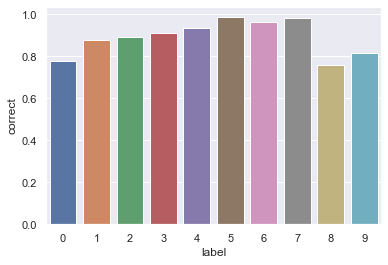

In [5]:
sns.barplot(x=accuracy_per_class.index, y=accuracy_per_class)

In [9]:
accuracy_per_subject = val_pred_df.groupby(['subject'], sort=True)['correct'].mean()
subject_count = val_pred_df.groupby(['subject'], sort=True)['correct'].count()
pd.DataFrame([subject_count, accuracy_per_subject])

subject,p021,p024,p039,p042,p050,p11,p17,p27,p28,p29,p34,p35,p36,p41
correct,1237.000000,1226.0000,651.000000,591.000000,790.000000,269.000000,346.000000,335.000000,531.000000,439.00000,200.00,200.000,200.000,200.000
correct,0.931285,0.9323,0.935484,0.932318,0.936709,0.892193,0.774566,0.620896,0.937853,0.76082,0.78,0.795,0.915,0.665


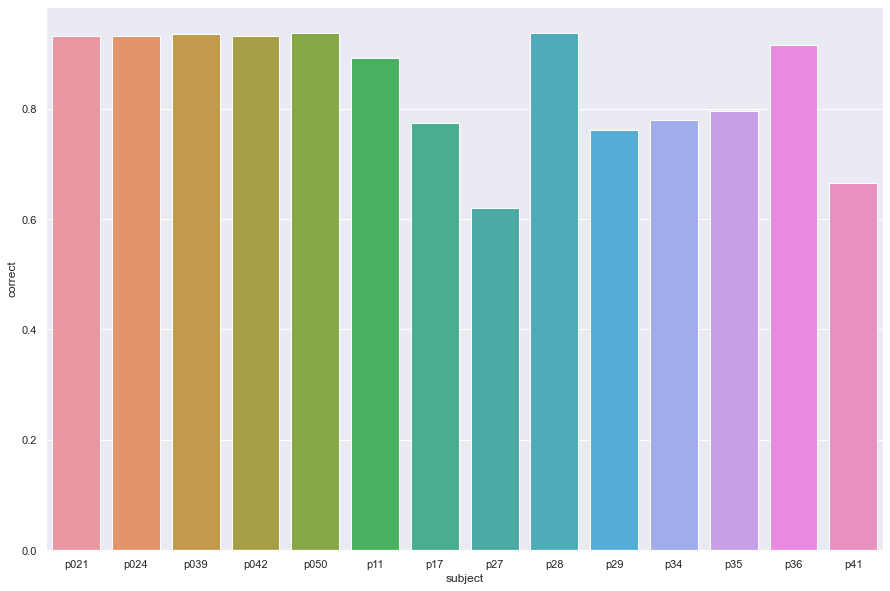

In [12]:
plt.figure(figsize=(15, 10))
sns.barplot(x=accuracy_per_subject.index, y=accuracy_per_subject)
plt.show()

In [13]:
accuracy_per_source = val_pred_df.groupby(['source'])['correct'].mean()
accuracy_per_source

source
Camera 1     0.806250
Camera 2     0.788750
StateFarm    0.933259
Name: correct, dtype: float64

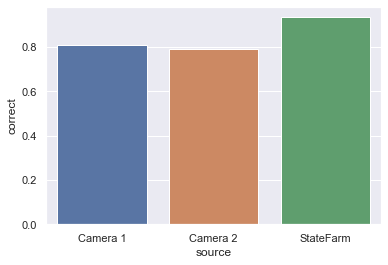

In [14]:
sns.barplot(x=accuracy_per_source.index, y=accuracy_per_source)
plt.show()